<a href="https://colab.research.google.com/github/Farhanahoque251/Drug-Discovery-with-Python/blob/main/Acetylcholinesterase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computational Drug Discovery [Part 1] :**Acetylcholinesterase**

In [1]:
! pip install chembl_webresource_client

In [2]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [3]:
# Target search for acetylcholinesterase
target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets


,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
1,[],Homo sapiens,Acetylcholinesterase,16.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Torpedo californica,Acetylcholinesterase,16.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
3,[],Mus musculus,Acetylcholinesterase,16.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
4,[],Rattus norvegicus,Acetylcholinesterase,16.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
5,[],Electrophorus electricus,Acetylcholinesterase,16.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
6,[],Bos taurus,Acetylcholinesterase,16.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913
7,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
8,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
9,[],Nephotettix cincticeps,Ace-orthologous acetylcholinesterase,16.0,False,CHEMBL2366514,"[{'accession': 'Q9NJH6', 'component_descriptio...",SINGLE PROTEIN,94400


In [4]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL220'

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)

In [7]:
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8


In [8]:
df.shape

(9415, 46)

In [9]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-9-955aac5800f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25724873,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5391657,Inhibition of Acetylcholinesterase (unknown or...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,46.0
9411,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25724874,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5391657,Inhibition of Acetylcholinesterase (unknown or...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,38.31
9412,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25733694,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393547,Inhibition of recombinant human AChE expressed...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,1.71
9413,None,None,25733695,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393547,Inhibition of recombinant human AChE expressed...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,10.0


In [10]:

len(df2.canonical_smiles.unique())

6642

In [11]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25724873,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5391657,Inhibition of Acetylcholinesterase (unknown or...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,46.0
9411,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25724874,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5391657,Inhibition of Acetylcholinesterase (unknown or...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,38.31
9412,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25733694,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393547,Inhibition of recombinant human AChE expressed...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,1.71
9413,None,None,25733695,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393547,Inhibition of recombinant human AChE expressed...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,10.0


In [12]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3


,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0
...,...,...,...
9410,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.0
9411,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.0
9412,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.0
9413,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.0


**Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [13]:
bioactivity_threshold = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [14]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
6564,NaN,NaN,NaN,inactive
6580,NaN,NaN,NaN,intermediate
6581,NaN,NaN,NaN,inactive
6594,NaN,NaN,NaN,inactive


**Part-2:Exploratory Data Analysis**

In [24]:
#Install conda and rdkit

! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-05-28 18:58:37--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.5’

Miniconda3-py37_4.8 100%[===================>]  81.12M   405MB/s    in 0.2s    

2025-05-28 18:58:37 (405 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.5’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    

In [16]:
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active


In [17]:
df_no_smiles = df4.drop(columns='canonical_smiles')

smiles = []
for i in df.canonical_smiles.tolist():
    cpd = str(i).split('.')
    cpd_longest = max(cpd, key=len)
    smiles.append(cpd_longest)

smiles = pd.Series(smiles, name='canonical_smiles', index=df.index)  # Keep index aligned with df

df_clean_smiles = pd.concat([df_no_smiles, smiles], axis=1)
df_clean_smiles.head()


,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C


In [18]:
# Ensure canonical_smiles column is string
df_clean_smiles['canonical_smiles'] = df_clean_smiles['canonical_smiles'].astype(str)

# Filter valid SMILES, keep original index for alignment
valid_smiles = df_clean_smiles[
    df_clean_smiles['canonical_smiles'].notna() &
    df_clean_smiles['canonical_smiles'].str.strip().ne('') &
    ~df_clean_smiles['canonical_smiles'].str.lower().isin(['nan', 'none'])
]

valid_smiles.head()


,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C


**Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

Molecular weight < 500 Dalton
Octanol-water partition coefficient (LogP) < 5
Hydrogen bond donors < 5
Hydrogen bond acceptors < 10

In [25]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import numpy as np
import pandas as pd


In [19]:
#Calculate descriptors

# 1. Define lipinski function (your code snippet)
def lipinski(smiles, verbose=False):
    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors



In [26]:
df_lipinski = lipinski(valid_smiles['canonical_smiles'])
df_lipinski.head()


,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0


In [27]:
# Reset indices before concatenation to avoid misalignment
valid_smiles = valid_smiles.reset_index(drop=True)
df_lipinski = df_lipinski.reset_index(drop=True)

# Combine original data with descriptors side-by-side
df_combined = pd.concat([valid_smiles, df_lipinski], axis=1)

# Check the combined dataframe
df_combined.head()


,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0


In [28]:
# Summary statistics for Lipinski descriptors
df_combined[['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']].describe()


,MW,LogP,NumHDonors,NumHAcceptors
count,9379.000000,9379.000000,9379.000000,9379.000000
mean,387.620365,4.063526,1.170914,4.402815
std,134.320549,2.086797,1.368733,2.303533
min,32.046000,-17.132900,0.000000,0.000000
25%,296.350000,2.709060,0.000000,3.000000
50%,378.516000,4.003900,1.000000,4.000000
75%,456.520000,5.189050,2.000000,6.000000
max,1767.464000,14.520300,25.000000,46.000000


In [29]:
# Define rule violations
df_combined['violations'] = (
    (df_combined['MW'] > 500).astype(int) +
    (df_combined['LogP'] > 5).astype(int) +
    (df_combined['NumHDonors'] > 5).astype(int) +
    (df_combined['NumHAcceptors'] > 10).astype(int)
)

# Count how many compounds have 0, 1, 2, ... violations
df_combined['violations'].value_counts().sort_index()


,count
violations,
0,6318
1,1720
2,1280
3,56
4,5


In [30]:
def list_violations(row):
    violations = []
    if row['MW'] > 500:
        violations.append('MW>500')
    if row['LogP'] > 5:
        violations.append('LogP>5')
    if row['NumHDonors'] > 5:
        violations.append('HDonors>5')
    if row['NumHAcceptors'] > 10:
        violations.append('HAcceptors>10')

    if not violations:
        return 'None'  # no violations
    else:
        return ', '.join(violations)

df_combined['violation_details'] = df_combined.apply(list_violations, axis=1)
df_combined[['MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'violations', 'violation_details']].head()


,MW,LogP,NumHDonors,NumHAcceptors,violations,violation_details
0,312.325,2.8032,0.0,6.0,0,None
1,376.913,4.5546,0.0,5.0,0,None
2,426.851,5.3574,0.0,5.0,1,LogP>5
3,404.845,4.7069,0.0,5.0,0,None
4,346.334,3.0953,0.0,6.0,0,None


**Convert IC50 to pIC50**
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [31]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [32]:
df_combined.standard_value.describe()

,standard_value
count,6642
unique,3015
top,10000.0
freq,256


In [33]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [34]:
-np.log10( (10**-9)* 10000000000 )

np.float64(-1.0)

In [35]:
def norm_value(df):
    # Convert to numeric and coerce errors to NaN
    df['standard_value'] = pd.to_numeric(df['standard_value'], errors='coerce')

    # Cap the values at 100,000,000
    df['standard_value_norm'] = df['standard_value'].apply(lambda x: min(x, 100000000) if pd.notnull(x) else x)

    # Drop the original column
    df = df.drop(columns=['standard_value'])

    return df


In [36]:
df_norm = norm_value(df_combined)
df_norm.head()

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,violations,violation_details,standard_value_norm
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,0,None,750.0
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,0,None,100.0
2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,1,LogP>5,50000.0
3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,0,None,300.0
4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,0,None,800.0


In [37]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,6.642000e+03
mean,1.026835e+05
std,8.884597e+05
min,0.000000e+00
25%,1.592500e+02
50%,2.600000e+03
75%,1.713000e+04
max,4.960000e+07


In [38]:
def pIC50(df):
    pIC50_values = []

    for val in df['standard_value_norm']:
        try:
            molar = val * (10**-9)  # Convert nM to Molar
            if molar > 0:
                pIC50_val = -np.log10(molar)
            else:
                pIC50_val = np.nan
        except:
            pIC50_val = np.nan
        pIC50_values.append(pIC50_val)

    df['pIC50'] = pIC50_values
    df = df.drop('standard_value_norm', axis=1)

    return df


In [39]:
df_final = pIC50(df_norm)
df_final.head()

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,violations,violation_details,pIC50
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,0,None,6.124939
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,0,None,7.000000
2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,1,LogP>5,4.301030
3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,0,None,6.522879
4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,0,None,6.096910


In [40]:
df_final.shape

(9379, 10)

In [41]:
df_final.pIC50.describe()

,pIC50
count,6641.000000
mean,5.801767
std,1.558782
min,1.304518
25%,4.765989
50%,5.585027
75%,6.795880
max,14.301030


In [42]:
print(df_final.columns.tolist())


['molecule_chembl_id', 'class', 'canonical_smiles', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'violations', 'violation_details', 'pIC50']


In [43]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class.head(2)

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,violations,violation_details,pIC50
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,0,None,6.124939
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,0,None,7.000000


**Exploratory Data Analysis** (Chemical Space Analysis) via Lipinski descriptors
**Import library**

In [44]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

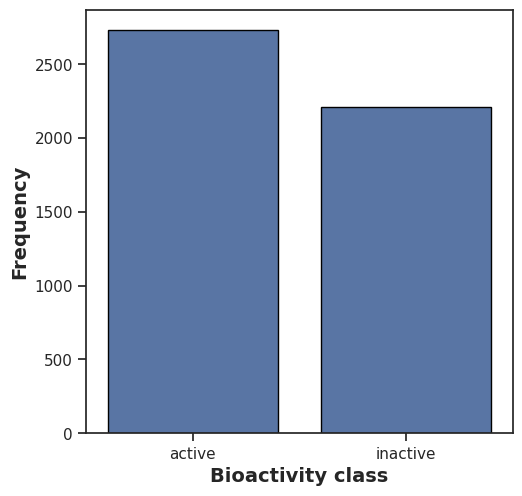

In [45]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

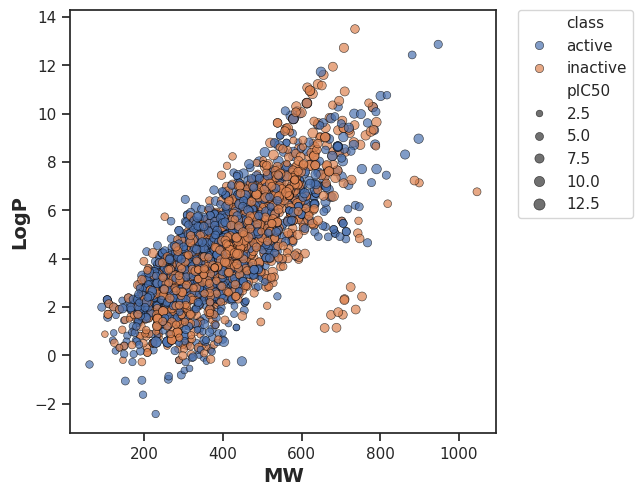

In [46]:
#Scatter plot of MW versus LogP
#It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

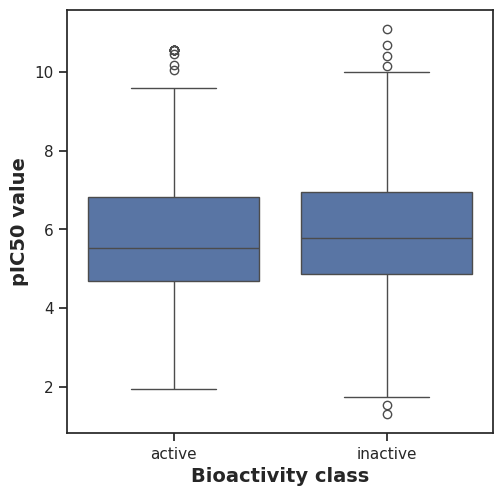

In [47]:
#Box plots
#pIC50 value

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')


In [48]:
#Statistical analysis | Mann-Whitney U Test
 # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

import pandas as pd
from scipy.stats import mannwhitneyu

def mannwhitney(descriptor, verbose=False):
    # Select relevant columns
    selection = [descriptor, 'class']
    df = df_2class[selection]

    # Split into active and inactive groups
    active = df[df['class'] == 'active'][descriptor]
    inactive = df[df['class'] == 'inactive'][descriptor]

    # Perform Mann-Whitney U test
    stat, p = mannwhitneyu(active, inactive)

    # Interpret result
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'

    # Create results DataFrame
    results = pd.DataFrame({
        'Descriptor': [descriptor],
        'Statistics': [stat],
        'p': [p],
        'alpha': [alpha],
        'Interpretation': [interpretation]
    })

    # Save result
    filename = f'mannwhitneyu_{descriptor}.csv'
    results.to_csv(filename, index=False)

    if verbose:
        print(results)

    return results



In [49]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,NaN,NaN,0.05,Different distribution (reject H0)


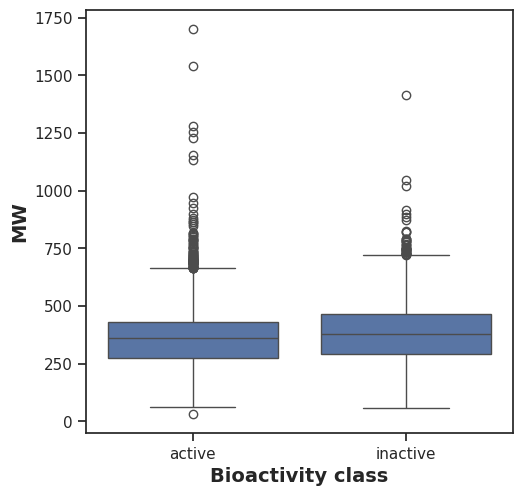

In [50]:
#MW

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [51]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,2729798.0,2.865561e-09,0.05,Different distribution (reject H0)


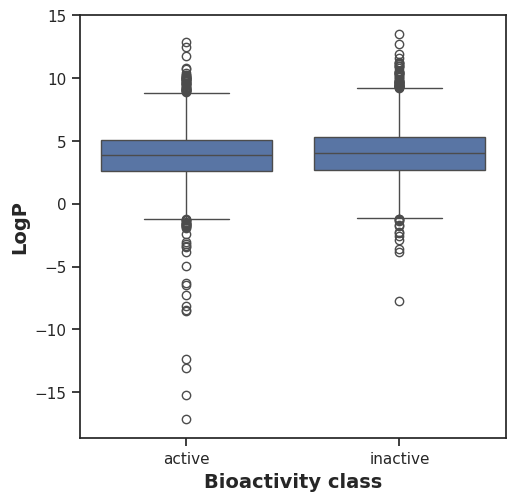

In [52]:
#LogP

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [53]:
#Statistical analysis | Mann-Whitney U Test


mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2856711.0,0.000676,0.05,Different distribution (reject H0)


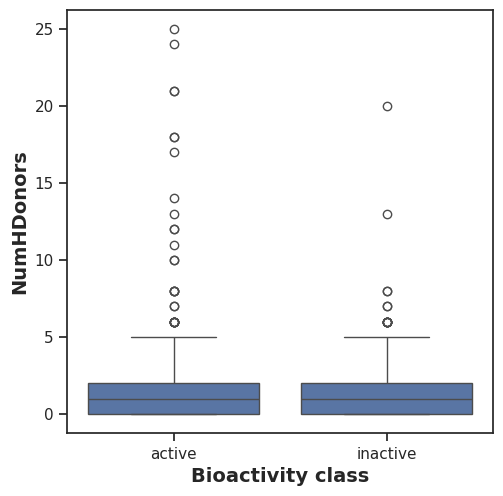

In [54]:
#NumHDonors

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [55]:
#Statistical analysis | Mann-Whitney U Test


mannwhitney('NumHDonors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3009639.0,0.721736,0.05,Same distribution (fail to reject H0)


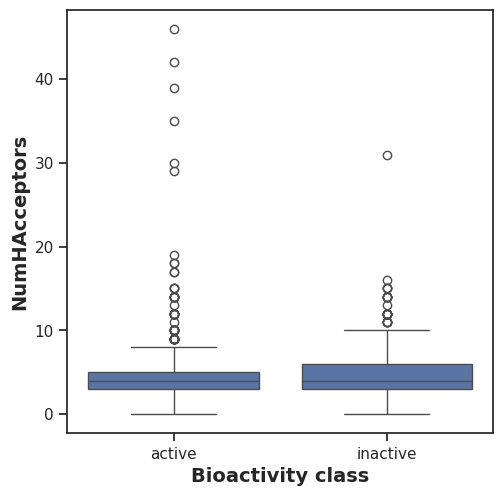

In [56]:
#NumHAcceptors

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')


In [57]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2836420.5,0.000111,0.05,Different distribution (reject H0)


**Interpretation of Statistical Results**
Box Plots
pIC50 values
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

Lipinski's descriptors
Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited no difference between the actives and inactives while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows statistically significant difference between actives and inactives.

**Part-3:Descriptor Calculation and Dataset Preparation**

In [61]:
#Download PaDEL-Descriptor

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2025-05-28 19:16:17--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2025-05-28 19:16:17--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.2’

padel.zip.2         100%[===================>]  24.57M  41.4MB/s    in 0.6s    

2025-05-28 19:16:20 (41.4 MB/s) - ‘padel.zip.2’ saved [25768637/25768637]

--2025-05-28 19:16:20--  https:/

In [64]:
!unzip -o padel.zip.2


Archive:  padel.zip.2
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inflating: PaDEL-Descriptor/PubchemFingerprinter.xml  
  inflating: __M

In [65]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df_2class[selection]

In [66]:
df3_selection

,canonical_smiles,molecule_chembl_id
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,CHEMBL133897
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,CHEMBL336398
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,CHEMBL131588
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,CHEMBL130628
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,CHEMBL130478
...,...,...
9374,O/N=C/c1cc[n+](COC[n+]2ccc(/C=N/O)cc2)cc1,NaN
9375,O/N=C/c1cc[n+](CCC[n+]2ccc(/C=N/O)cc2)cc1,NaN
9376,Cc1cc(/C=N/O)c(O)c(CN2CCN(c3ccncc3)CC2)c1,NaN
9377,O/N=C/c1cc(Cl)cc(CN2CCN(c3ccncc3)CC2)c1O,NaN


In [67]:
df_combined

,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,violations,violation_details,standard_value_norm
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.80320,0.0,6.0,0,None,750.0
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.55460,0.0,5.0,0,None,100.0
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.35740,0.0,5.0,1,LogP>5,50000.0
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.70690,0.0,5.0,0,None,300.0
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.09530,0.0,6.0,0,None,800.0
...,...,...,...,...,...,...,...,...,...,...,...
9374,NaN,NaN,NaN,O/N=C/c1cc[n+](COC[n+]2ccc(/C=N/O)cc2)cc1,288.307,0.50960,2.0,5.0,0,None,NaN
9375,NaN,NaN,NaN,O/N=C/c1cc[n+](CCC[n+]2ccc(/C=N/O)cc2)cc1,286.335,0.96810,2.0,4.0,0,None,NaN
9376,NaN,NaN,NaN,Cc1cc(/C=N/O)c(O)c(CN2CCN(c3ccncc3)CC2)c1,326.400,2.22592,2.0,6.0,0,None,NaN
9377,NaN,NaN,NaN,O/N=C/c1cc(Cl)cc(CN2CCN(c3ccncc3)CC2)c1O,346.818,2.57090,2.0,6.0,0,None,NaN


In [68]:
# Create a .smi file from df_combind for PaDEL
df_combined[["canonical_smiles", "molecule_chembl_id"]].to_csv("molecule.smi", sep="\t", index=False, header=False)


In [69]:
! cat molecule.smi | head -5

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478


In [70]:
! cat molecule.smi | wc -l

9379


**Calculate fingerprint descriptors
Calculate PaDEL descriptors **


In [71]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [72]:
! bash padel.sh

Streaming output truncated to the last 5000 lines.
Processing CHEMBL4161343 in molecule.smi (4405/9379). Average speed: 0.14 s/mol.
Processing CHEMBL4171941 in molecule.smi (4406/9379). Average speed: 0.14 s/mol.
Processing CHEMBL4176452 in molecule.smi (4407/9379). Average speed: 0.14 s/mol.
Processing CHEMBL4168588 in molecule.smi (4408/9379). Average speed: 0.14 s/mol.
Processing CHEMBL4168198 in molecule.smi (4409/9379). Average speed: 0.14 s/mol.
Processing CHEMBL4160280 in molecule.smi (4410/9379). Average speed: 0.14 s/mol.
Processing CHEMBL4164761 in molecule.smi (4411/9379). Average speed: 0.14 s/mol.
Processing CHEMBL4175384 in molecule.smi (4412/9379). Average speed: 0.14 s/mol.
Processing CHEMBL4166257 in molecule.smi (4413/9379). Average speed: 0.14 s/mol.
Processing CHEMBL4176868 in molecule.smi (4414/9379). Average speed: 0.14 s/mol.
Processing CHEMBL4165100 in molecule.smi (4415/9379). Average speed: 0.14 s/mol.
Processing CHEMBL4173000 in molecule.smi (4416/9379). Aver

In [73]:
! ls -l

total 590916
-rw-r--r-- 1 root root 16705760 May 28 19:46 descriptors_output.csv
drwxr-xr-x 3 root root     4096 May 28 19:24 __MACOSX
-rw-r--r-- 1 root root      122 May 28 19:11 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      121 May 28 19:11 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      132 May 28 19:11 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      128 May 28 19:11 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root       93 May 28 19:11 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Feb 13 19:49 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root 85055499 Feb 13 19:49 Miniconda3-py37_4.8.2-Linux-x86_64.sh.1
-rw-r--r-- 1 root root 85055499 Feb 13 19:49 Miniconda3-py37_4.8.2-Linux-x86_64.sh.2
-rw-r--r-- 1 root root 85055499 Feb 13 19:49 Miniconda3-py37_4.8.2-Linux-x86_64.sh.3
-rw-r--r-- 1 root root 85055499 Feb 13 19:49 Miniconda3-py37_4.8.2-Linux-x86_64.sh.4
-rw-r--r-- 1 root root 85055499 Feb 13 19:49 Miniconda3-py37_4.8.2-Linux-x86_64.sh.5
-rw-r--r

Preparing the X and Y Data Matrices
X data matrix

In [74]:
df_X = pd.read_csv('descriptors_output.csv')

In [75]:
df_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL133897,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL336398,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL130628,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL130478,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL131588,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,AUTOGEN_molecule_9375,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9375,AUTOGEN_molecule_9376,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9376,AUTOGEN_molecule_9377,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9377,AUTOGEN_molecule_9378,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
df_X = df_X.drop(columns=['Name'])
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9375,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9376,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9377,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Y variable
Convert IC50 to pIC50



In [77]:
df_Y = df_2class['pIC50']
df_Y

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910
...,...
9374,NaN
9375,NaN
9376,NaN
9377,NaN


Combining X and Y variable


In [78]:
dataset = pd.concat([df_X,df_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.124939
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.301030
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.522879
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9375,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9376,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9377,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
#dataset3.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)


**Part-4:Regression Models with Random Forest**

In [79]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold

In [80]:
df=dataset

3. Input features
The Acetylcholinesterase data set contains 881 input features and 1 output variable (pIC50 values).

In [81]:
# Define features and target
X = df.drop('pIC50', axis=1)
Y = df['pIC50']

In [82]:
# Remove low variance features
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_reduced = selection.fit_transform(X)

In [83]:
# Convert reduced X back to DataFrame to keep compatibility
X_df = pd.DataFrame(X_reduced)

In [84]:
# Convert Y to Series with a name
Y_series = pd.Series(Y.values, name="pIC50")

In [85]:
# Combine X and Y for dropping NaNs
data = pd.concat([X_df, Y_series], axis=1)


In [86]:
# Drop rows with any NaNs
data_clean = data.dropna()

In [87]:
# Separate cleaned data
X_clean = data_clean.drop(columns=["pIC50"])
Y_clean = data_clean["pIC50"]

In [88]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_clean, Y_clean, test_size=0.2)


In [89]:
# Train the model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)

RandomForestRegressor()

In [90]:
# Evaluate the model
r = model.score(X_test, Y_test)
print("R² score:", r)

R² score: 0.5706641782200894


In [91]:
r = model.score(X_test, Y_test)
r

0.5706641782200894

In [92]:
Y_pred = model.predict(X_test)

6. Scatter Plot of Experimental vs Predicted pIC50 Values


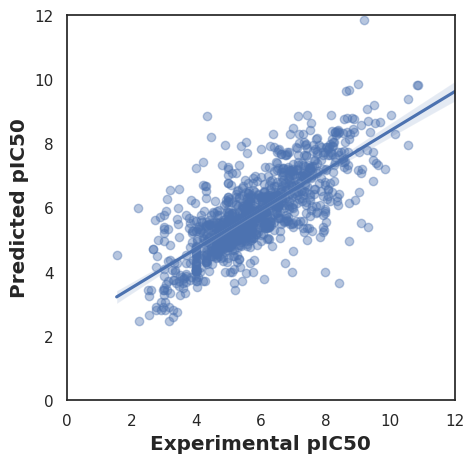

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

# Ensure Y_test and Y_pred are aligned Series/arrays
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()


**Part-5:Comparing Regressors**

In [150]:
dataset.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.12
1,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.00
2,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.30
3,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.52
4,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.10


In [163]:
import sys
print(sys.version)


3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]


In [165]:
!pip install xgboost
!pip install lightgbm


In [169]:
! pip install lazypredict

In [170]:
! git clone https://github.com/shankarpandala/lazypredict.git
% cd lazypredict
! python setup.py install

Cloning into 'lazypredict'...
remote: Enumerating objects: 1876, done.
remote: Counting objects: 100% (508/508), done.
remote: Compressing objects: 100% (207/207), done.
remote: Total 1876 (delta 327), reused 357 (delta 297), pack-reused 1368 (from 2)
Receiving objects: 100% (1876/1876), 24.07 MiB | 20.82 MiB/s, done.
Resolving deltas: 100% (993/993), done.


UsageError: Line magic function `%` not found.


In [173]:
!pip install scikit-learn==1.1.3


ERROR: Ignored the following versions that require a different python version: 1.1.0 Requires-Python >=3.8; 1.1.1 Requires-Python >=3.8; 1.1.2 Requires-Python >=3.8; 1.1.3 Requires-Python >=3.8; 1.2.0 Requires-Python >=3.8; 1.2.0rc1 Requires-Python >=3.8; 1.2.1 Requires-Python >=3.8; 1.2.2 Requires-Python >=3.8; 1.3.0 Requires-Python >=3.8; 1.3.0rc1 Requires-Python >=3.8; 1.3.1 Requires-Python >=3.8; 1.3.2 Requires-Python >=3.8; 1.4.0 Requires-Python >=3.9; 1.4.0rc1 Requires-Python >=3.9; 1.4.1.post1 Requires-Python >=3.9; 1.4.2 Requires-Python >=3.9; 1.5.0 Requires-Python >=3.9; 1.5.0rc1 Requires-Python >=3.9; 1.5.1 Requires-Python >=3.9; 1.5.2 Requires-Python >=3.9; 1.6.0 Requires-Python >=3.9; 1.6.0rc1 Requires-Python >=3.9; 1.6.1 Requires-Python >=3.9; 1.7.0rc1 Requires-Python >=3.10
ERROR: Could not find a version that satisfies the requirement scikit-learn==1.1.3 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.1

In [174]:
import lazypredict
print(lazypredict.__file__)


/usr/local/lib/python3.7/site-packages/lazypredict/__init__.py


In [176]:
file_path = "/usr/local/lib/python3.7/site-packages/lazypredict/Supervised.py"

with open(file_path, "r") as f:
    content = f.read()

content = content.replace("sparse=False", "sparse_output=False")

with open(file_path, "w") as f:
    f.write(content)

print("Patch applied successfully.")



Patch applied successfully.


In [177]:
from lazypredict.Supervised import LazyClassifier


In [179]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)


In [186]:
from sklearn.preprocessing import OneHotEncoder
from lazypredict.Supervised import LazyClassifier

# Option 1: Fix it
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)


In [207]:
print("Number of NaNs in X_train:", np.isnan(X_train_clean).sum())
print("Number of NaNs in X_test:", np.isnan(X_test).sum())


Number of NaNs in X_train: 0
Number of NaNs in X_test: 0


In [216]:
print(X_train.shape)  # e.g. (4437, 881)
print(y_train.shape)  # must be (4437,) or (4437, 1)
print(X_test.shape)
print(y_test.shape)


(4437, 881)
(4451,)
(1127, 881)
(1113,)


In [219]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(4451, 881) (4451,)
(1113, 881) (1113,)


In [221]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import time

results = {}

for name, model in models.items():
    try:
        start_time = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        end_time = time.time()

        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)  # no squared param here
        rmse = np.sqrt(mse)
        duration = end_time - start_time

        results[name] = {
            "R-Squared": round(r2, 2),
            "RMSE": round(rmse, 2),
            "Time Taken": round(duration, 2),
        }
    except Exception as e:
        print(f"{name} model failed to execute: {e}")

df_results = pd.DataFrame.from_dict(results, orient='index')
print(df_results[['R-Squared', 'RMSE', 'Time Taken']])


                       R-Squared  RMSE  Time Taken
DecisionTreeRegressor       0.26  1.32        0.38
ExtraTreesRegressor         0.28  1.30        2.70
RandomForestRegressor       0.58  1.00        1.68
ElasticNet                 -0.00  1.54        0.04


In [225]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import (
    ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor,
    HistGradientBoostingRegressor, GradientBoostingRegressor, AdaBoostRegressor
)
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.linear_model import (
    Ridge, LassoCV, ElasticNetCV, RidgeCV, LinearRegression, SGDRegressor,
    BayesianRidge, HuberRegressor, LassoLarsCV, LassoLarsIC, Lars,
    OrthogonalMatchingPursuitCV, OrthogonalMatchingPursuit, LarsCV,
    Lasso, ElasticNet, PassiveAggressiveRegressor
)
from sklearn.compose import TransformedTargetRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.kernel_ridge import KernelRidge

# Define models dictionary
models = {
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "ExtraTreeRegressor": ExtraTreeRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "BaggingRegressor": BaggingRegressor(),
    "MLPRegressor": MLPRegressor(max_iter=500),
    "HistGradientBoostingRegressor": HistGradientBoostingRegressor(),
    "LGBMRegressor": LGBMRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
    "Ridge": Ridge(),
    "LassoCV": LassoCV(max_iter=1000),
    "ElasticNetCV": ElasticNetCV(max_iter=1000),
    "RidgeCV": RidgeCV(),
    "TransformedTargetRegressor": TransformedTargetRegressor(regressor=LinearRegression()),
    "LinearRegression": LinearRegression(),
    "SGDRegressor": SGDRegressor(max_iter=1000, tol=1e-3),
    "BayesianRidge": BayesianRidge(),
    "HuberRegressor": HuberRegressor(),
    "LassoLarsCV": LassoLarsCV(),
    "LassoLarsIC": LassoLarsIC(),
    "LinearSVR": LinearSVR(max_iter=10000),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "Lars": Lars(),
    "OrthogonalMatchingPursuitCV": OrthogonalMatchingPursuitCV(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
    "LarsCV": LarsCV(),
    "Lasso": Lasso(max_iter=1000),
    "ElasticNet": ElasticNet(max_iter=1000),
    "DummyRegressor": DummyRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(max_iter=1000, tol=1e-3),
    "KernelRidge": KernelRidge(),
    "RANSACRegressor": RANSACRegressor()
}

results = {}

for name, model in models.items():
    try:
        start_time = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        duration = time.time() - start_time

        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        results[name] = {
            "R-Squared": round(r2, 2),
            "RMSE": round(rmse, 2),
            "Time Taken": round(duration, 2)
        }
    except Exception as e:
        print(f"{name} model failed to execute: {e}")

df_results = pd.DataFrame.from_dict(results, orient='index')
df_results = df_results.sort_values(by="R-Squared", ascending=False)

print(df_results[['R-Squared', 'RMSE', 'Time Taken']])


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1016
[LightGBM] [Info] Number of data points in the train set: 4451, number of used features: 508
[LightGBM] [Info] Start training from score 5.824962
                                                       R-Squared  \
RandomForestRegressor                                       0.62   
HistGradientBoostingRegressor                               0.60   
XGBRegressor                                                0.60   
LGBMRegressor                                               0.60   
BaggingRegressor                                            0.58   
KNeighborsRegressor                                         0.55   
SVR                                                         0.50   
NuSVR                                             

In [227]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

# All models as defined earlier
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import (
    ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor,
    HistGradientBoostingRegressor, GradientBoostingRegressor, AdaBoostRegressor
)
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import (
    Ridge, LassoCV, ElasticNetCV, RidgeCV, LinearRegression, SGDRegressor,
    BayesianRidge, HuberRegressor, LassoLarsCV, LassoLarsIC, Lars,
    OrthogonalMatchingPursuitCV, OrthogonalMatchingPursuit, LarsCV,
    Lasso, ElasticNet, PassiveAggressiveRegressor
)
from sklearn.compose import TransformedTargetRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.kernel_ridge import KernelRidge

# Define models dictionary
models = {
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "ExtraTreeRegressor": ExtraTreeRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "BaggingRegressor": BaggingRegressor(),
    "MLPRegressor": MLPRegressor(max_iter=500),
    "HistGradientBoostingRegressor": HistGradientBoostingRegressor(),
    "LGBMRegressor": LGBMRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
    "Ridge": Ridge(),
    "LassoCV": LassoCV(max_iter=1000),
    "ElasticNetCV": ElasticNetCV(max_iter=1000),
    "RidgeCV": RidgeCV(),
    "TransformedTargetRegressor": TransformedTargetRegressor(regressor=LinearRegression()),
    "LinearRegression": LinearRegression(),
    "SGDRegressor": SGDRegressor(max_iter=1000, tol=1e-3),
    "BayesianRidge": BayesianRidge(),
    "HuberRegressor": HuberRegressor(),
    "LassoLarsCV": LassoLarsCV(),
    "LassoLarsIC": LassoLarsIC(),
    "LinearSVR": LinearSVR(max_iter=10000),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "Lars": Lars(),
    "OrthogonalMatchingPursuitCV": OrthogonalMatchingPursuitCV(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
    "LarsCV": LarsCV(),
    "Lasso": Lasso(max_iter=1000),
    "ElasticNet": ElasticNet(max_iter=1000),
    "DummyRegressor": DummyRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(max_iter=1000, tol=1e-3),
    "KernelRidge": KernelRidge(),
    "RANSACRegressor": RANSACRegressor()
}

# Initialize dictionary to store results
results_test = {}

# Evaluate each model
for name, model in models.items():
    try:
        start_time = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        duration = time.time() - start_time

        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        results_test[name] = {
            "R-Squared": round(r2, 2),
            "RMSE": round(rmse, 2),
            "Time Taken": round(duration, 2)
        }
    except Exception as e:
        print(f"{name} failed: {e}")

# Convert to DataFrame with desired format
predictions_test = pd.DataFrame(results_test).T  # Transpose so models are rows
predictions_test.index.name = "Model"
predictions_test = predictions_test[["R-Squared", "RMSE", "Time Taken"]]
predictions_test = predictions_test.sort_values(by="R-Squared", ascending=False)

# Display result
predictions_test



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1016
[LightGBM] [Info] Number of data points in the train set: 4451, number of used features: 508
[LightGBM] [Info] Start training from score 5.824962


,R-Squared,RMSE,Time Taken
Model,,,
RandomForestRegressor,0.61,0.96,18.77
HistGradientBoostingRegressor,0.60,0.97,5.61
XGBRegressor,0.60,0.98,1.33
LGBMRegressor,0.60,0.97,0.36
BaggingRegressor,0.58,0.99,1.71
KNeighborsRegressor,0.55,1.03,0.27
SVR,0.50,1.09,16.52
NuSVR,0.49,1.10,10.93
MLPRegressor,0.46,1.13,47.30


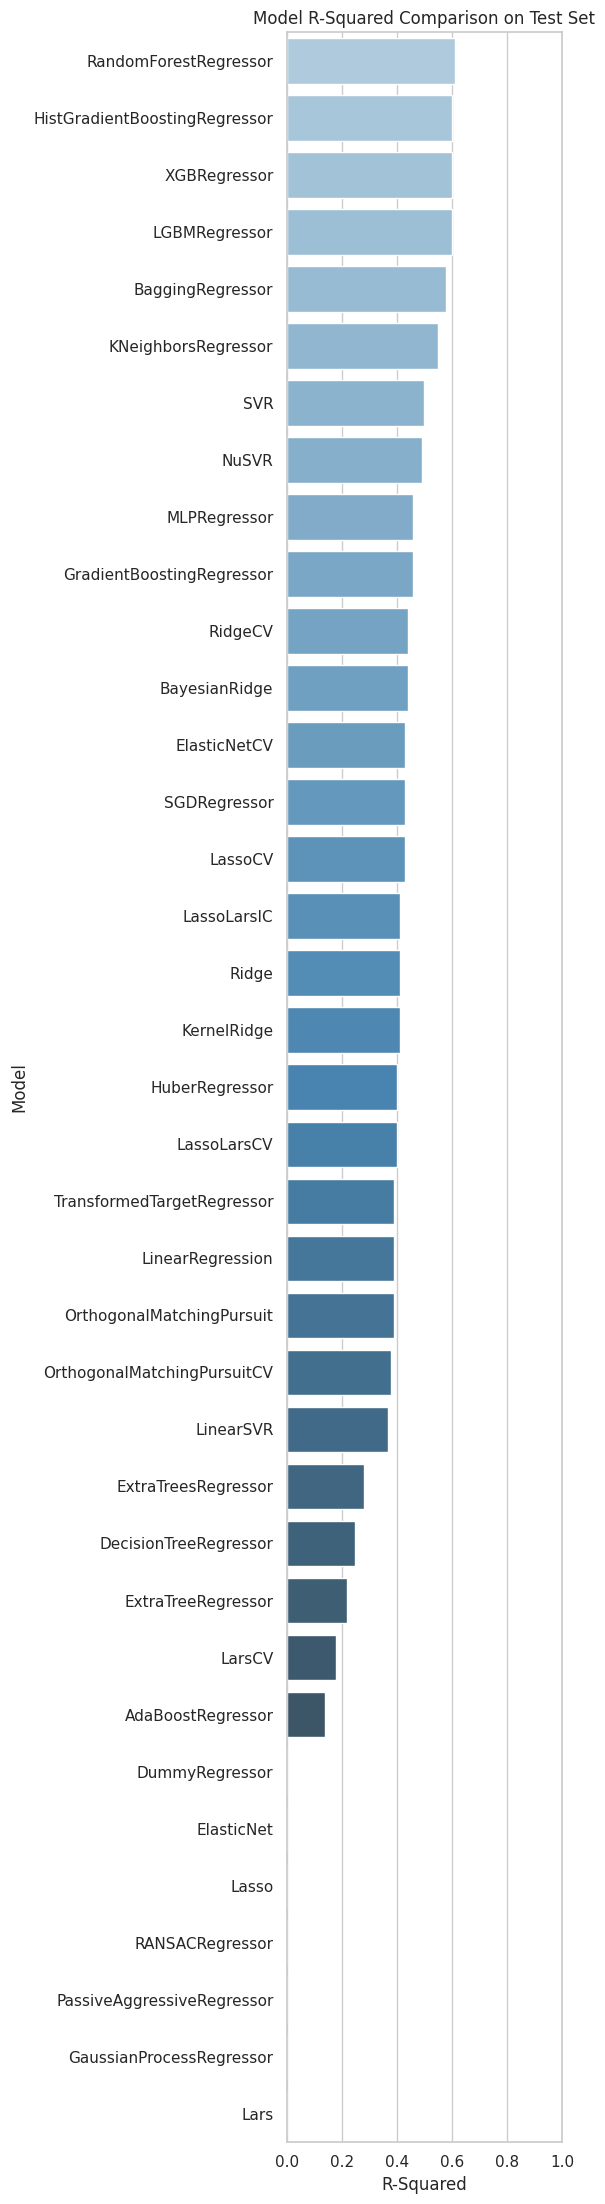

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

# If the index contains model names, reset it to a column for seaborn compatibility
predictions_test = predictions_test.reset_index().rename(columns={'index': 'Model'})

# Optional: Replace negative R-squared values with 0
predictions_test["R-Squared"] = predictions_test["R-Squared"].apply(lambda x: max(x, 0))

# Set plot style and size
plt.figure(figsize=(6, len(predictions_test) * 0.6))
sns.set_theme(style="whitegrid")

# Horizontal bar plot
sns.barplot(
    data=predictions_test,
    x="R-Squared",
    y="Model",
    palette="Blues_d"
)

# Customize plot
plt.xlim(0, 1)
plt.xlabel("R-Squared")
plt.ylabel("Model")
plt.title("Model R-Squared Comparison on Test Set")
plt.tight_layout()
plt.show()
